# KNN and SVM

## Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

### Problema de negócio

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

### Base de dados

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

### Desafio

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sb
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np

#Pré Processamento 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Avaliando o Modelos
from sklearn.metrics import accuracy_score

### Importando a base de dados

In [2]:
url = 'data/Recrutamento.xlsx'

df_recrutamento = pd.read_excel(url)

df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


### Análise Exploratória

In [3]:
df_recrutamento.shape

(215, 15)

A colune status, traz a informação se a pessoa foi ou não contratada pela empresa.

Agora iremos ver se a nossa coluna esta realmente composta por Yes or No com a função **set()**, para que possamos utilizar ela, sem risco de ter valores divergentes.

In [4]:
set(df_recrutamento.status)

{'No', 'Yes'}

In [5]:
df_recrutamento.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df_recrutamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Iremos utilizar a biblioteca **missingno** para tratarmos nossa base em questões de valores nulos.

<Axes: >

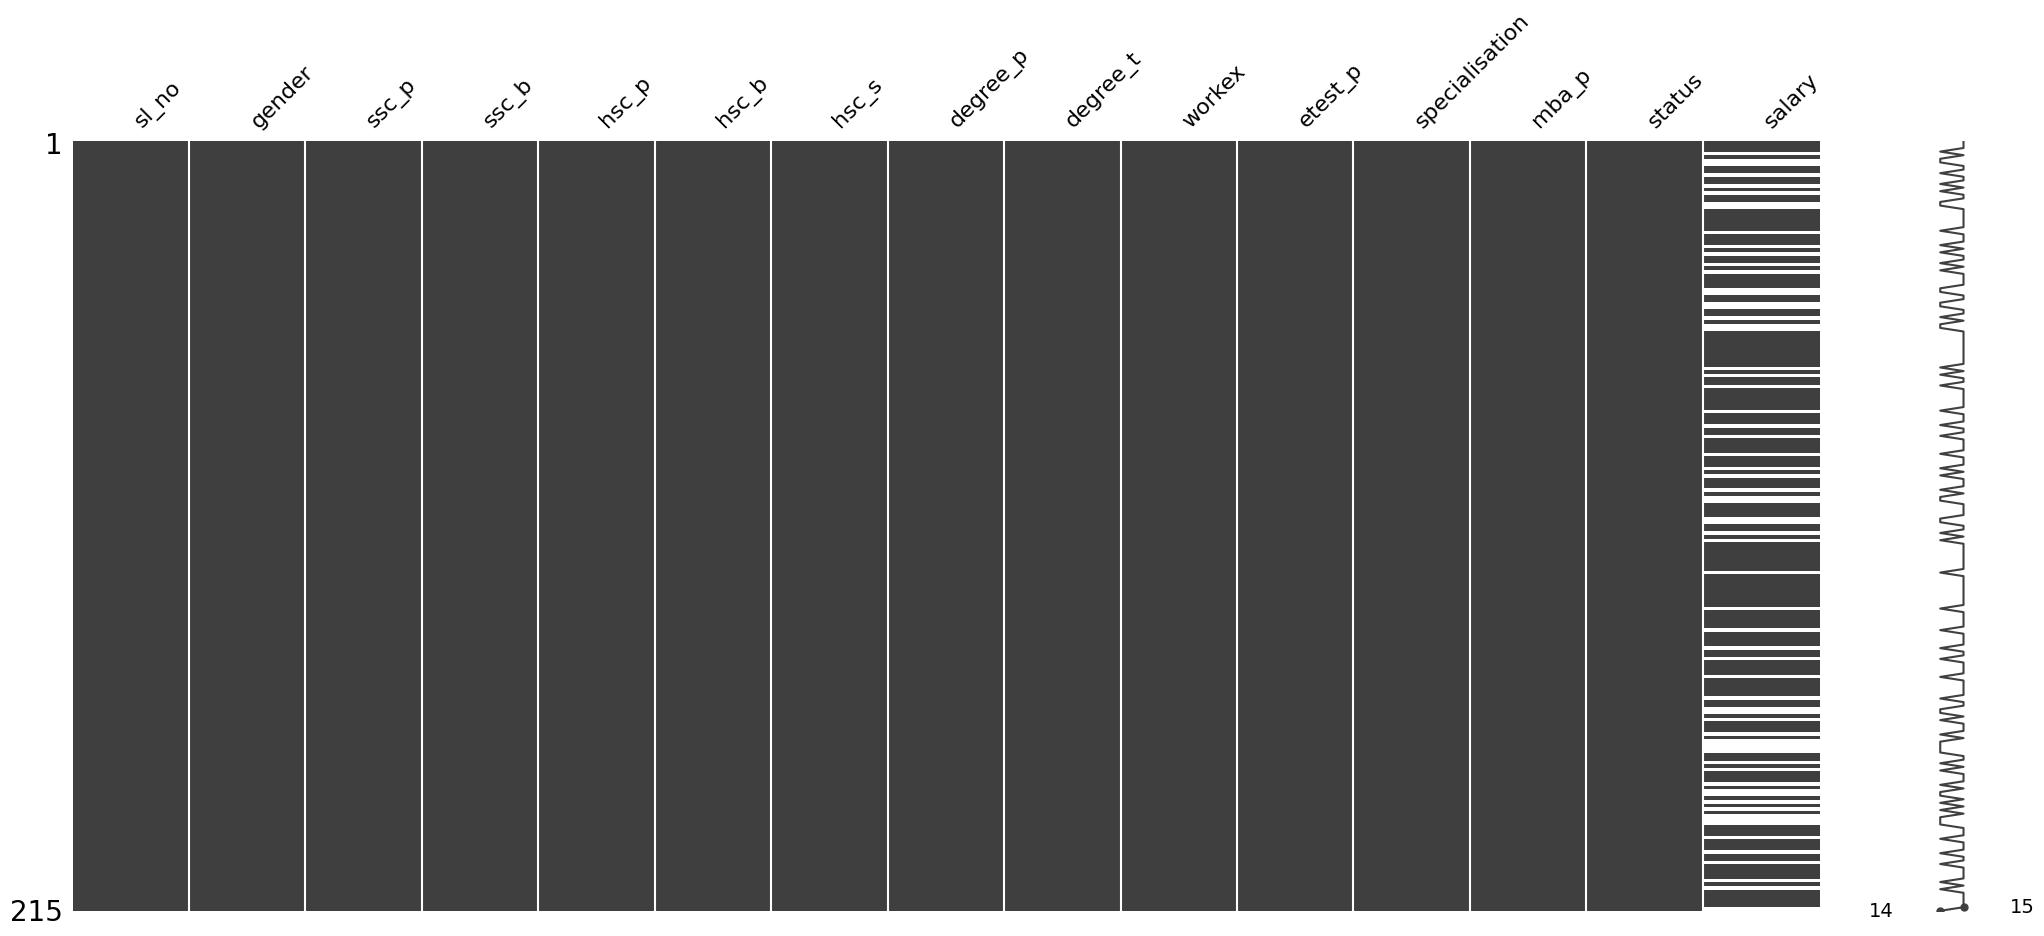

In [7]:
msno.matrix(df_recrutamento)

* o que a biblioteca irá mostrar para nós?

A função **Matrix** função gera uma visualização em formato de matriz mostrando a presença (ou ausência) de valores em cada coluna do DataFrame.

Ela facilita a detecção de colunas com muitos valores ausentes, a perceber padrões de ausência (por exemplo: várias colunas com nulos nas mesmas linhas → pode indicar dependência entre variáveis), e também serve como um diagnóstico visual rápido antes de decidir como tratar os valores ausentes (remoção, preenchimento, etc.).

In [8]:
df_recrutamento.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Agora iremos verificar como essa distribuição da coluna salário esta afetando nossa variável target(status).

C:\Users\icors\AppData\Local\Temp\ipykernel_99804\4177035739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="status", y="salary", data=df_recrutamento, palette="hls")


<Axes: xlabel='status', ylabel='salary'>

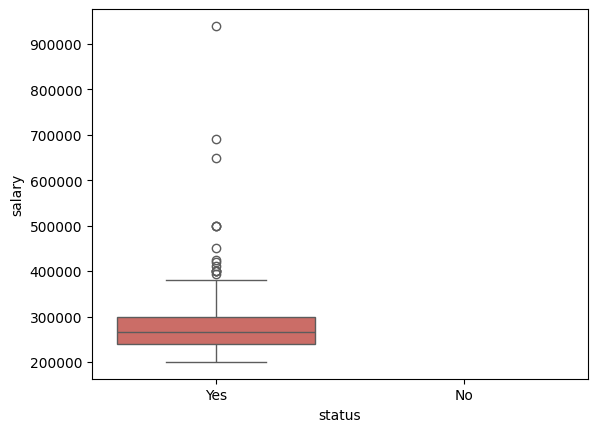

In [9]:
sb.boxplot(x="status", y="salary", data=df_recrutamento, palette="hls")

Aqui conseguimos notar que aqueles valores nulos estão atribuidos ao nosso status de "No".

Sendo assim, vamos atribuir o valor de 0 para os valores null, utilizando a função **fillna()**.

In [10]:
df_recrutamento['salary'].fillna(value=0, inplace=True)

C:\Users\icors\AppData\Local\Temp\ipykernel_99804\977506886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_recrutamento['salary'].fillna(value=0, inplace=True)


In [11]:
df_recrutamento.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Quando formos análisar nossa base de dados, geralmente utilizamos o gráfico de boxplot e histogramas, para análisar valores númericos, e gráfico de barras para variáveis categóricas.

### Entendendo o comportamento da nossa base de dados.

<Axes: xlabel='hsc_p'>

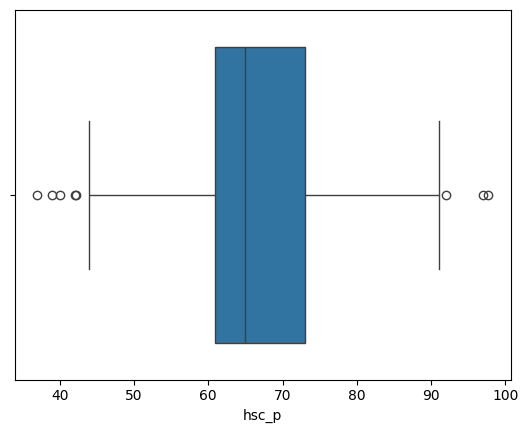

In [12]:
sb.boxplot(x=df_recrutamento['hsc_p'])

<Axes: xlabel='hsc_p', ylabel='Count'>

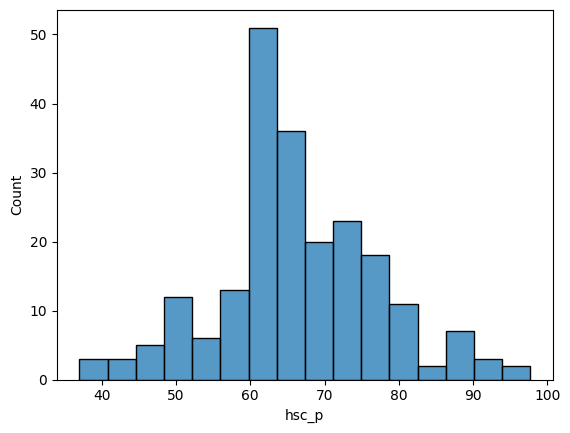

In [13]:
sb.histplot(data=df_recrutamento, x='hsc_p')

<Axes: xlabel='degree_p'>

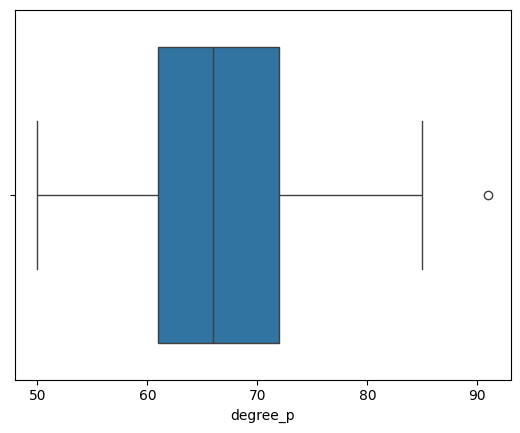

In [14]:
sb.boxplot(x=df_recrutamento['degree_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

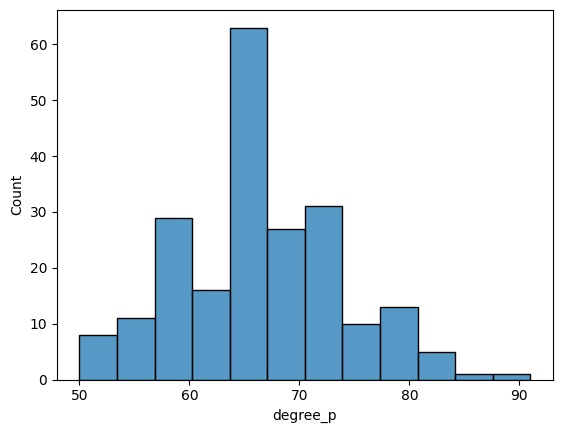

In [15]:
sb.histplot(data=df_recrutamento, x='degree_p')

<Axes: xlabel='etest_p'>

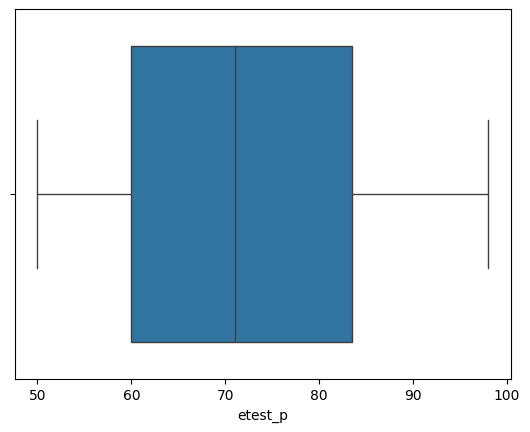

In [16]:
sb.boxplot(x=df_recrutamento['etest_p'])

<Axes: xlabel='mba_p'>

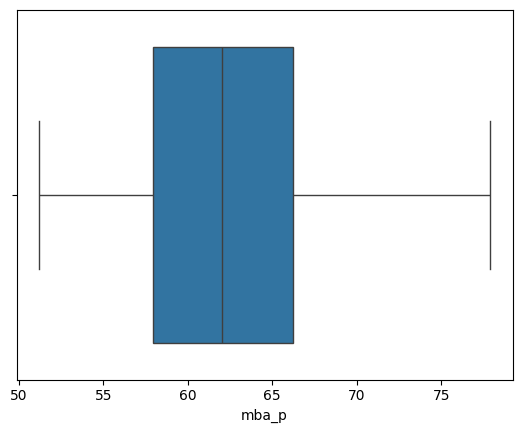

In [17]:
sb.boxplot(x=df_recrutamento['mba_p'])

<Axes: xlabel='salary'>

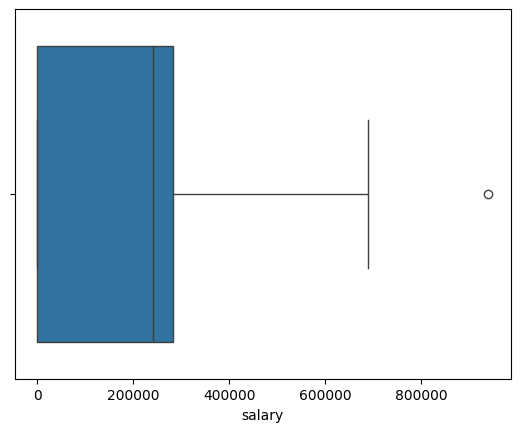

In [18]:
sb.boxplot(x=df_recrutamento['salary'])

<Axes: xlabel='salary', ylabel='Count'>

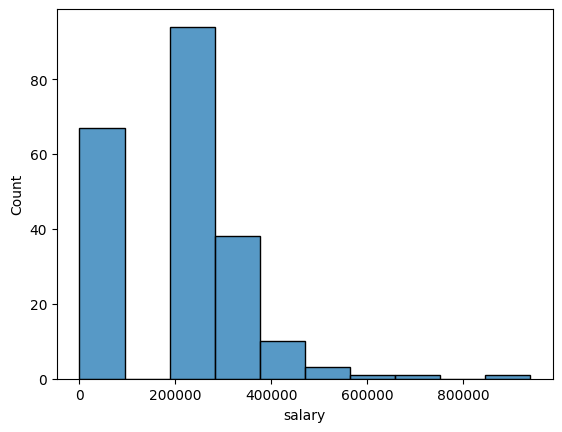

In [19]:
sb.histplot(data=df_recrutamento, x='salary')

Conseguimos perceber de acordo com o **boxplot** que a nossa variável salário é a única do qual esta com um comportamento difente (assimétrica).

Agora vamos analisar se a presença de especializações exerce alguma influência sobre a variável salário.

[Text(36.25, 0.5, 'mba_p')]

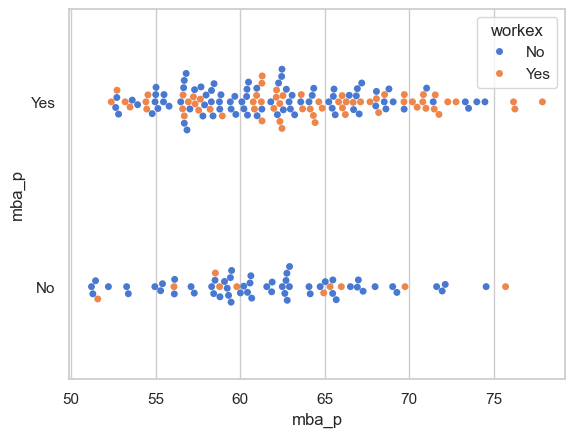

In [20]:
#Configurando o Gráfico
sb.set_theme(style="whitegrid", palette="muted")
ax = sb.swarmplot(data=df_recrutamento, x='mba_p', y='status', hue='workex')
ax.set(ylabel="mba_p")


Conseguimos notar que a maioria das pessoas que possuem especializações foram aceitos na empresa.

Agora vamos verificar se o fator gênero exerce influência no processo de contratação.

In [21]:
px.violin(df_recrutamento, y='salary', x='specialisation', color='gender', box=True, points='all')

### Análise de correlação

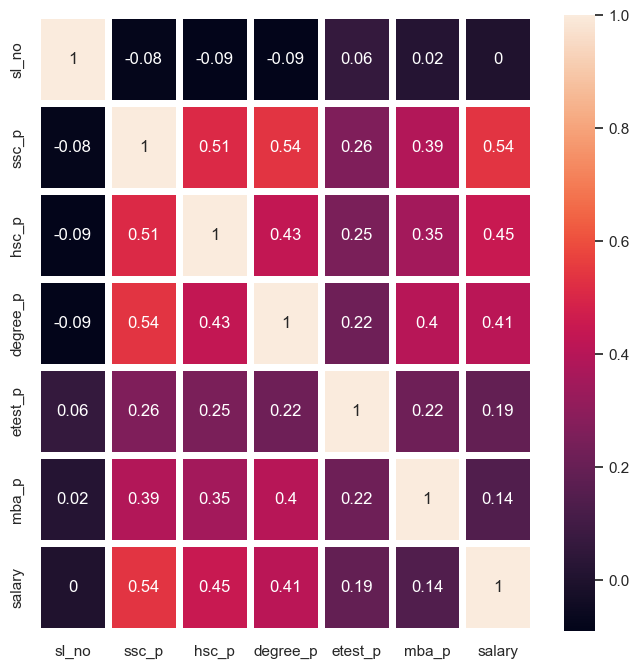

In [22]:
correlation_matriz = df_recrutamento.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()


Agora iremos ver como padronizar nossas variáveis categóricas para verificar a correlações delas.

In [23]:
df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


Aqui iremos selecionar todas as colunas que podem ser transformadas em binários 1(sim) ou 0(não).

In [24]:
colunas = ["gender", "workex", "specialisation", "status"]

label_encoder = LabelEncoder()

for col in colunas:
    df_recrutamento[col] = label_encoder.fit_transform(df_recrutamento[col])

In [25]:
df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


Agora sobrou as colunas que não podem ser transformada em binárias por ter mais de duas variação de categórias.

In [26]:
dummy_hsc_s = pd.get_dummies(df_recrutamento["hsc_s"], prefix="dummy")

dummy_degree_t = pd.get_dummies(df_recrutamento["degree_t"], prefix="dummy")

dados_dummy = pd.concat([df_recrutamento, dummy_hsc_s, dummy_degree_t], axis=1)

Estamos juntando todas as bases, com a função **concat()**.

In [27]:
dados_dummy

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,...,0,74.49,1,400000.0,False,True,False,True,False,False
211,212,1,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,...,0,53.62,1,275000.0,False,False,True,False,False,True
212,213,1,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,...,0,69.72,1,295000.0,False,True,False,True,False,False
213,214,0,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,...,1,60.23,1,204000.0,False,True,False,True,False,False


Agora iremos remover as colunas que fizemos essa lógica.

In [28]:
dados_dummy.drop(["hsc_s", "degree_t", "salary"], axis=1, inplace=True)

dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


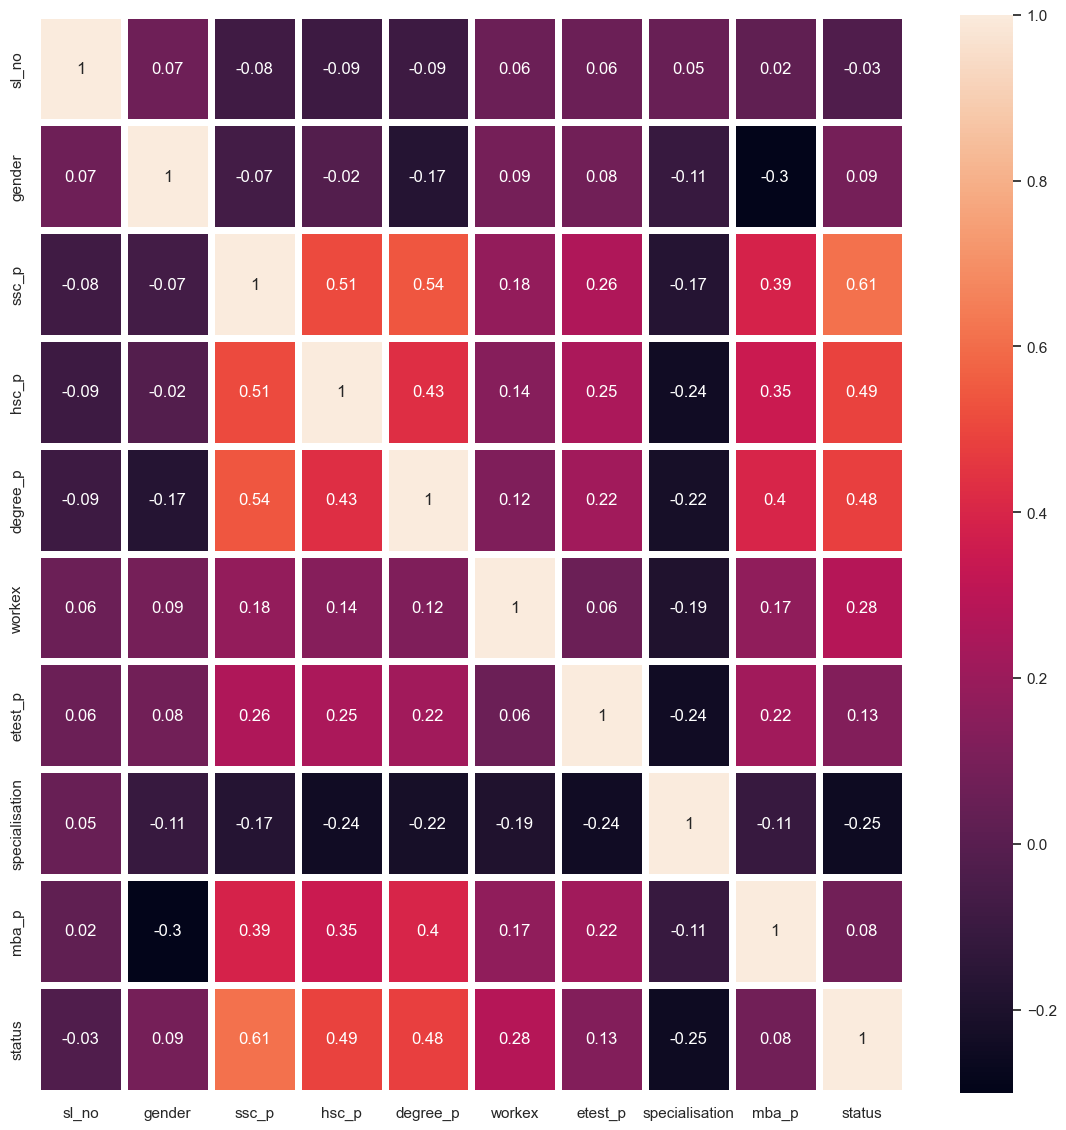

In [29]:
correlation_matriz = dados_dummy.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(14,14))
sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

### Separando nossa base de dados para o modelo

In [30]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [31]:
x= dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]

y = dados_dummy['status']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [33]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


Podemos notar que as nossas variáveis não estão nas mesmas escalas, sendo assim, precisamos padroniza-las.

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

x_train_escalonado


array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

Aqui estamos verificando quantos vizinhos, serão necessários para uma melhor previsão do nosso modelo.

In [36]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))


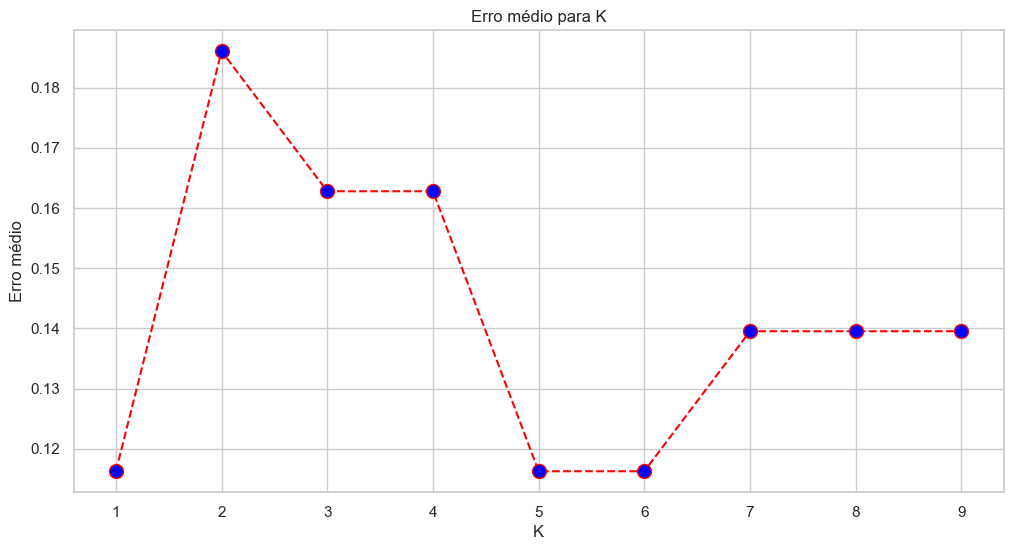

In [37]:
plt.figure(figsize=(12,6))

plt.plot(range(1,10), error, color="red", linestyle="dashed", marker='o', markerfacecolor="blue", markersize=10)
plt.title("Erro médio para K")
plt.xlabel("K")
plt.ylabel("Erro médio")
plt.show()

### Modelo KNN

In [38]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predict = modelo_classificador.predict(x_test_escalonado)

In [39]:
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

### Avaliando modelo KNN

In [40]:
print(accuracy_score(y_test, y_predict))

0.8837209302325582


### Modelo SVM

In [41]:
svm = Pipeline([("LinearSVC", LinearSVC(C=1))])

In [42]:
svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('LinearSVC', LinearSVC(C=1))])

In [43]:
y_predict_svm = svm.predict(x_test_escalonado)

print(accuracy_score(y_test, y_predict_svm))

0.8604651162790697
